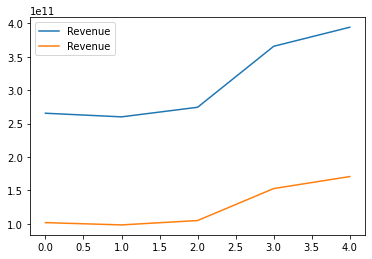

In [9]:

import requests
import matplotlib.pyplot as plt

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'AAPL'
years = 10

income_statement = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")
income_statement = income_statement.json()


revenues = list(reversed([income_statement[i]['revenue'] for i in range(len(income_statement))]))
profits = list(reversed([income_statement[i]['grossProfit'] for i in range(len(income_statement))]))

plt.plot(revenues, label = 'Revenue')
plt.plot(profits, label = 'Revenue')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
import requests
import matplotlib.pyplot as plt

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'AAPL'
years = 5

income_statements = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")
income_statements = income_statements.json()

balance_sheets = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}")
balance_sheets = balance_sheets.json()

cash_flows = requests.get(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?limit={years}&apikey={api_key}")
cash_flows = cash_flows.json()

discount_rate = 0.1
growth_rate = 0.05

fcf_list = []
for i in range(years):
    income_statement = income_statements[i]
    balance_sheet = balance_sheets[i]
    cash_flow = cash_flows[i]

    ebit = income_statement['ebitda'] - income_statement['depreciationAndAmortization']
    tax_rate = income_statement['incomeTaxExpense'] / income_statement['incomeBeforeTax']
    change_in_nwc = (balance_sheet['totalCurrentAssets'] - balance_sheet['totalCurrentLiabilities']) - \
                    (balance_sheets[i+1]['totalCurrentAssets'] - balance_sheets[i+1]['totalCurrentLiabilities'] if i < years-1 else 0)
    capex = cash_flow['capitalExpenditure']
    
    fcf = ebit*(1-tax_rate) + income_statement['depreciationAndAmortization'] - change_in_nwc - capex
    fcf_list.append(fcf)

dcf = sum([fcf / ((1 + discount_rate) ** (i+1)) for i, fcf in enumerate(fcf_list)])

print("The DCF value is:", dcf)


The DCF value is: 392542779741.2795


In [25]:
import requests
import matplotlib.pyplot as plt

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'MU'
years = 5

income_statements = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")
income_statements = income_statements.json()

balance_sheets = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}")
balance_sheets = balance_sheets.json()

cash_flows = requests.get(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?limit={years}&apikey={api_key}")
cash_flows = cash_flows.json()

company_profile = requests.get(f"https://financialmodelingprep.com/api/v3/profile/{company}?apikey={api_key}")
company_profile = company_profile.json()

discount_rate = 0.3
growth_rate = 0.05

fcf_list = []
for i in range(years):
    income_statement = income_statements[i]
    balance_sheet = balance_sheets[i]
    cash_flow = cash_flows[i]

    net_income = income_statement['netIncome']
    interest_expense = income_statement['interestExpense'] if 'interestExpense' in income_statement else 0
    tax_rate = income_statement['incomeTaxExpense'] / income_statement['incomeBeforeTax'] if income_statement['incomeBeforeTax'] != 0 else 0
    depreciation_amortization = income_statement['depreciationAndAmortization']
    change_in_nwc = (balance_sheet['totalCurrentAssets'] - balance_sheet['totalCurrentLiabilities']) - \
                    (balance_sheets[i+1]['totalCurrentAssets'] - balance_sheets[i+1]['totalCurrentLiabilities'] if i < years-1 else 0)
    capex = cash_flow['capitalExpenditure']

    fcf = net_income + (1 - tax_rate) * interest_expense + depreciation_amortization - change_in_nwc - capex
    fcf_list.append(fcf)

terminal_value = fcf_list[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
dcf = sum([fcf / ((1 + discount_rate) ** (i + 1)) for i, fcf in enumerate(fcf_list)]) + terminal_value / ((1 + discount_rate) ** years)

shares_outstanding = company_profile[0]['mktCap'] / company_profile[0]['price'] # market cap divided by share price
dcf_per_share = dcf / shares_outstanding

print("The DCF value per share is:", dcf_per_share)


The DCF value per share is: 66.81350560818191


In [12]:
x = 392542779741.2795/15787154000
x

24.864695672271232

In [30]:
discount_rate = 0.3
growth_rate = 0.05

fcf_list = []
for i in range(years):
    income_statement = income_statements[i]
    balance_sheet = balance_sheets[i]
    cash_flow = cash_flows[i]

    net_income = income_statement['netIncome']
    interest_expense = income_statement['interestExpense'] if 'interestExpense' in income_statement else 0
    tax_rate = income_statement['incomeTaxExpense'] / income_statement['incomeBeforeTax'] if income_statement['incomeBeforeTax'] != 0 else 0
    depreciation_amortization = income_statement['depreciationAndAmortization']
    change_in_nwc = (balance_sheet['totalCurrentAssets'] - balance_sheet['totalCurrentLiabilities']) - \
                    (balance_sheets[i+1]['totalCurrentAssets'] - balance_sheets[i+1]['totalCurrentLiabilities'] if i < years-1 else 0)
    capex = cash_flow['capitalExpenditure']

    fcf = net_income + (1 - tax_rate) * interest_expense + depreciation_amortization - change_in_nwc - capex
    fcf_list.append(fcf)
    
    print(f"Projected Free Cash Flow for year {i+1}: {fcf}")

terminal_value = fcf_list[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
dcf = sum([fcf / ((1 + discount_rate) ** (i + 1)) for i, fcf in enumerate(fcf_list)]) + terminal_value / ((1 + discount_rate) ** years)

shares_outstanding = company_profile[0]['mktCap'] / company_profile[0]['price'] # market cap divided by share price
dcf_per_share = dcf / shares_outstanding

print("\nThe DCF value per share is:", dcf_per_share)


Projected Free Cash Flow for year 1: 27388464528.26246
Projected Free Cash Flow for year 2: 20729404310.067547
Projected Free Cash Flow for year 3: 15692790144.150185
Projected Free Cash Flow for year 4: 21928414301.929626
Projected Free Cash Flow for year 5: 17825984063.745018

The DCF value per share is: 66.81350560818191


Projected Free Cash Flow for year 1: 152003047228.02954
Projected Free Cash Flow for year 2: 148308155200.67395
Projected Free Cash Flow for year 3: 97014478827.26447
Projected Free Cash Flow for year 4: 38675848395.880554
Projected Free Cash Flow for year 5: 71919713345.12982

The DCF value per share is: 150.5014583989681


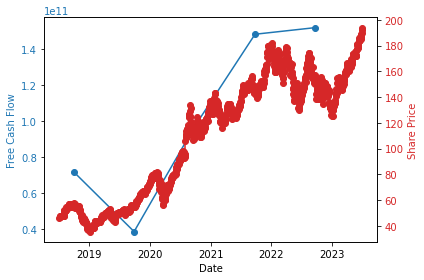

In [45]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'AAPL'
years = 5

# Getting the financial data
income_statements = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}").json()
balance_sheets = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}").json()
cash_flows = requests.get(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?limit={years}&apikey={api_key}").json()
company_profile = requests.get(f"https://financialmodelingprep.com/api/v3/profile/{company}?apikey={api_key}").json()

# Getting the historical stock prices
stock_prices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{company}?apikey={api_key}").json()['historical'][-years*252:] # Approximate trading days in a year

# Preparing the date-price dictionary for the stock
price_movement = {datetime.strptime(price['date'], '%Y-%m-%d'): price['close'] for price in stock_prices}

#assumptions change based on the company you are analysing 
discount_rate = 0.05
growth_rate = 0.02

fcf_list = []
fcf_dict = {} # to store free cash flows and their dates
for i in range(years):
    income_statement = income_statements[i]
    balance_sheet = balance_sheets[i]
    cash_flow = cash_flows[i]

    net_income = income_statement['netIncome']
    interest_expense = income_statement['interestExpense'] if 'interestExpense' in income_statement else 0
    tax_rate = income_statement['incomeTaxExpense'] / income_statement['incomeBeforeTax'] if income_statement['incomeBeforeTax'] != 0 else 0
    depreciation_amortization = income_statement['depreciationAndAmortization']
    change_in_nwc = (balance_sheet['totalCurrentAssets'] - balance_sheet['totalCurrentLiabilities']) - \
                    (balance_sheets[i+1]['totalCurrentAssets'] - balance_sheets[i+1]['totalCurrentLiabilities'] if i < years-1 else 0)
    capex = cash_flow['capitalExpenditure']

    fcf = net_income + (1 - tax_rate) * interest_expense + depreciation_amortization - change_in_nwc - capex
    fcf_list.append(fcf)
    fcf_dict[datetime.strptime(income_statement['date'], '%Y-%m-%d')] = fcf
    print(f"Projected Free Cash Flow for year {i+1}: {fcf}")

terminal_value = fcf_list[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
dcf = sum([fcf / ((1 + discount_rate) ** (i + 1)) for i, fcf in enumerate(fcf_list)]) + terminal_value / ((1 + discount_rate) ** years)

shares_outstanding = company_profile[0]['mktCap'] / company_profile[0]['price'] # market cap divided by share price
dcf_per_share = dcf / shares_outstanding


print("\nThe DCF value per share is:", dcf_per_share)

# Plotting free cash flows and share price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Free Cash Flow', color=color)
ax1.plot_date(list(fcf_dict.keys()), list(fcf_dict.values()), 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Share Price', color=color) 
ax2.plot_date(list(price_movement.keys()), list(price_movement.values()), 'o-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()



The DCF value per share is: 85.35355454040786


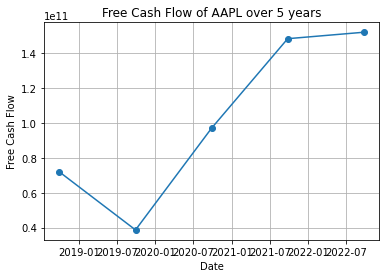

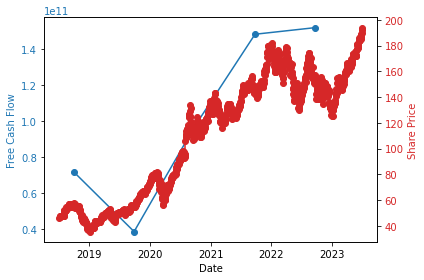

In [36]:
# ... previous code

print("\nThe DCF value per share is:", dcf_per_share)

# Plotting free cash flows only
plt.figure()
plt.plot_date(list(fcf_dict.keys()), list(fcf_dict.values()), 'o-')
plt.xlabel('Date')
plt.ylabel('Free Cash Flow')
plt.title(f'Free Cash Flow of {company} over {years} years')
plt.grid(True)
plt.show()

# Plotting free cash flows and share price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Free Cash Flow', color=color)
ax1.plot_date(list(fcf_dict.keys()), list(fcf_dict.values()), 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Share Price', color=color) 
ax2.plot_date(list(price_movement.keys()), list(price_movement.values()), 'o-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()



The DCF value per share is: 85.35355454040786


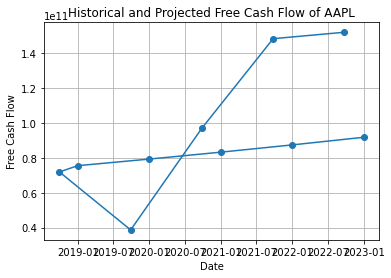

In [38]:

# ... previous code

print("\nThe DCF value per share is:", dcf_per_share)

# Projecting the next 5 years of free cash flows
projected_fcf_dict = {}
base_fcf = fcf_list[-1]  # Last year's FCF
growth_rate = 0.05  # Assumed growth rate for FCF
for i in range(1, 6):  # Next 5 years
    projected_year = list(fcf_dict.keys())[-1].year + i
    projected_fcf = base_fcf * ((1 + growth_rate) ** i)
    projected_fcf_dict[datetime(projected_year, 1, 1)] = projected_fcf

# Plotting projected free cash flows
plt.figure()
plt.plot_date(list(fcf_dict.keys()) + list(projected_fcf_dict.keys()), list(fcf_dict.values()) + list(projected_fcf_dict.values()), 'o-')
plt.xlabel('Date')
plt.ylabel('Free Cash Flow')
plt.title(f'Historical and Projected Free Cash Flow of {company}')
plt.grid(True)
plt.show()




The DCF value per share is: 85.35355454040786


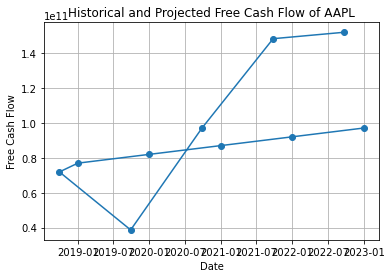

In [40]:
# ... previous code

print("\nThe DCF value per share is:", dcf_per_share)

# Projecting the next 5 years of free cash flows
projected_fcf_dict = {}
base_fcf = fcf_list[-1]  # Last year's FCF
growth_increment = base_fcf * 0.07  # We now compute the fixed growth increment
for i in range(1, 6):  # Next 5 years
    projected_year = list(fcf_dict.keys())[-1].year + i
    projected_fcf = base_fcf + (growth_increment * i)  # Adding the growth increment for each year
    projected_fcf_dict[datetime(projected_year, 1, 1)] = projected_fcf

# Plotting projected free cash flows
plt.figure()
plt.plot_date(list(fcf_dict.keys()) + list(projected_fcf_dict.keys()), list(fcf_dict.values()) + list(projected_fcf_dict.values()), 'o-')
plt.xlabel('Date')
plt.ylabel('Free Cash Flow')
plt.title(f'Historical and Projected Free Cash Flow of {company}')
plt.grid(True)
plt.show()
